# Paginas importantes

https://www.nature.com/articles/s41597-020-0386-x
https://physionet.org/content/ecg-arrhythmia/1.0.0/

# Estudio de arritmia cardíaca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de librerías

* __numpy:__ Para manipulación numérica y funciones estadísticas básicas
* __matplotlib.pyplot:__ Para generación de gráficos.
* __scipy.io:__ Para carga de datos provenientes de archivos _.mat_
* __scipy.signal:__ Para análisis de señales de la librería SCIPY
* __scipy.optimize:__ Para realizar el ajuste de curva

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as signal
from scipy.signal import freqz, butter, cheby1, firwin
from scipy.optimize import curve_fit

## Configuración de carpetas

In [ ]:
data_path = "/content/drive/MyDrive/ECG_Dataset/"

## Carga de datos

[Archivo de descarga](../../data/JS00001.mat)

In [ ]:
data = sio.loadmat(data_path+"JS00001.mat")

In [ ]:
print(type(data))


<class 'dict'>


In [ ]:
print(data.keys())


dict_keys(['val'])


In [ ]:
print(type(data["val"]))


<class 'numpy.ndarray'>


In [ ]:
print(data["val"].shape)

(12, 5000)


In [ ]:
lead_10 = data["val"][9, :]

In [ ]:
t0 = 0
tf = 10
t = np.linspace(t0, tf, 5000)

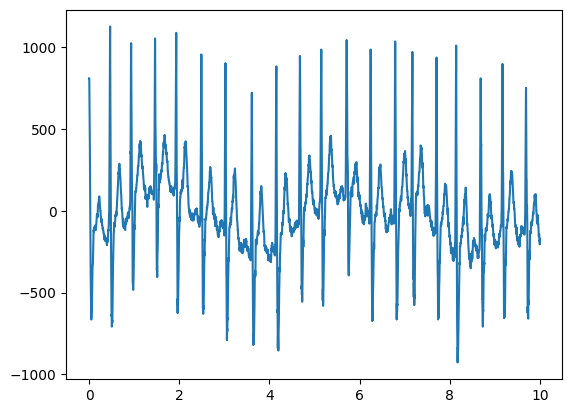

In [ ]:
fig01 = plt.figure()
plt.plot(t,lead_10)

In [ ]:
ecg_fft = np.fft.fft(lead_10)
ecg_fft

array([ -50343.             +0.j        ,
        -44427.87292792 -48118.33430899j,
        -14003.60280291-331886.8477886j , ...,
       -134619.87742102 -46991.97629606j,
        -14003.60280291+331886.8477886j ,
        -44427.87292792 +48118.33430899j])

In [ ]:
mag_ecg_fft = np.abs(ecg_fft)
f_vect = np.fft.fftfreq(len(mag_ecg_fft))

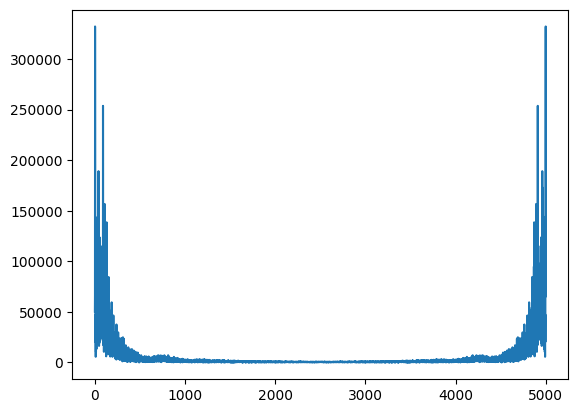

In [ ]:
plt.plot(mag_ecg_fft)

In [ ]:
N = len(mag_ecg_fft)
f_vect1 = 500*f_vect[:np.uint(N/2)]
mag_ecg_fft1 = mag_ecg_fft[:np.uint(N/2)]

Text(0.5, 0, 'Frequency (Hz)')

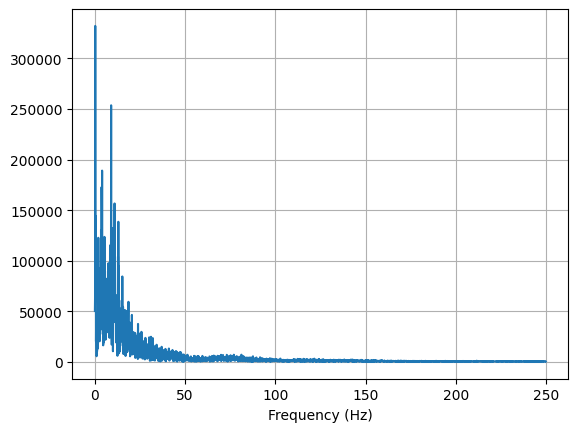

In [ ]:
plt.plot(f_vect1, mag_ecg_fft1)
plt.grid()
plt.xlabel("Frequency (Hz)")

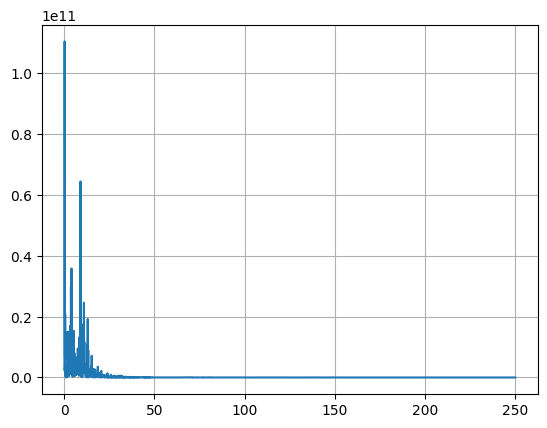

In [ ]:
plt.plot(f_vect1, mag_ecg_fft1**2)
plt.grid()

In [ ]:
fs = 500
fcut = 50
order = 4

f_corte = fcut/(fs/2)

b, a = signal.butter(order, f_corte, "lowpass")

In [ ]:
def plot_filter_response(b, a=1, fs=1.0):
    """Grafica la respuesta en frecuencia de un filtro dado."""
    w, h = freqz(b, a, worN=2048, fs=fs)  # Calcula la respuesta en frecuencia

    # Magnitud de la respuesta en frecuencia
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(w, 20 * np.log10(abs(h)), "b")
    plt.title("Respuesta en Frecuencia del Filtro")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.grid()

    # Fase de la respuesta en frecuencia
    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h), "g")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Fase [radianes]")
    plt.grid()

    plt.tight_layout()
    plt.show()


# Parámetros del filtro
fs = 1000  # Frecuencia de muestreo en Hz
cutoff = 200  # Frecuencia de corte en Hz
order = 4  # Orden del filtro

# Filtro IIR Butterworth
b_iir, a_iir = butter(order, cutoff, fs=fs, btype="low", analog=False)
print("Filtro IIR Butterworth")
plot_filter_response(b_iir, a_iir, fs=fs)

# Filtro FIR (ventana de Hamming)
numtaps = 50  # Número de coeficientes del FIR
b_fir = firwin(numtaps, cutoff, fs=fs, window="hamming")
print("Filtro FIR (Ventana de Hamming)")
plot_filter_response(b_fir, fs=fs)

In [ ]:
ecg_filt_1 = signal.lfilter(b, a, lead_10)
ecg_filt_2 = signal.filtfilt(b, a, lead_10) # No causal.

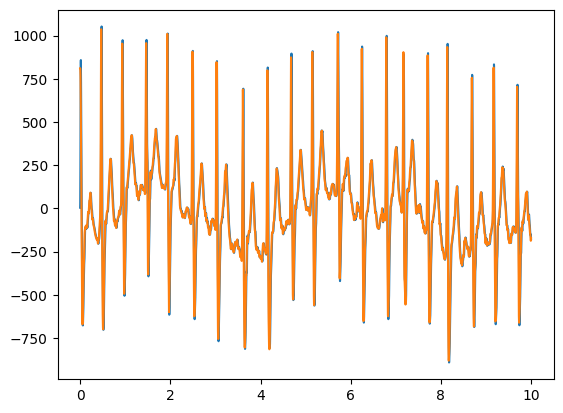

In [ ]:
plt.plot(t, ecg_filt_1)
plt.plot(t, ecg_filt_2)

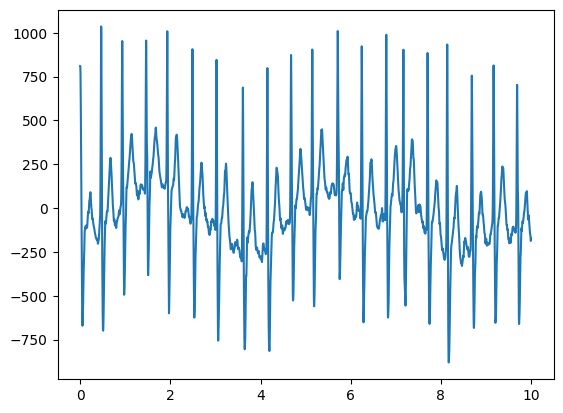

In [ ]:
plt.plot(t, ecg_filt_2)

Text(0.5, 0, 'Frequency (Hz)')

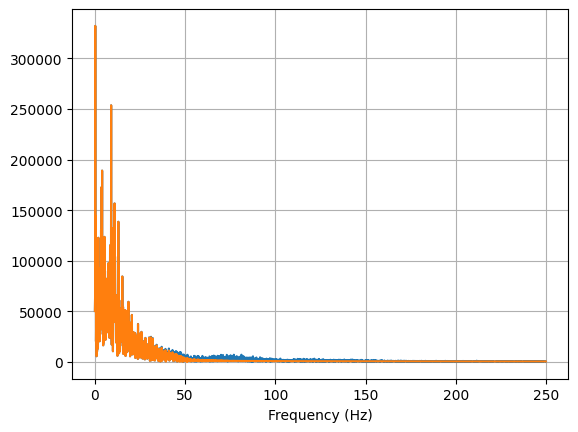

In [ ]:
mag_ecg_filt = np.abs(np.fft.fft(ecg_filt_2))[:np.uint(N/2)]

plt.plot(f_vect1, mag_ecg_fft1)
plt.plot(f_vect1, mag_ecg_filt)
plt.grid()
plt.xlabel("Frequency (Hz)")

In [ ]:
def modelo_artefacto(time, p0, p1, p2, p3, p4):
  return p0+p1*np.sin(p2*time)+p3*np.cos(p4*time)

In [ ]:
popt, pcov = curve_fit(modelo_artefacto, t, ecg_filt_2)

In [ ]:
popt[1]

152.2437794044702

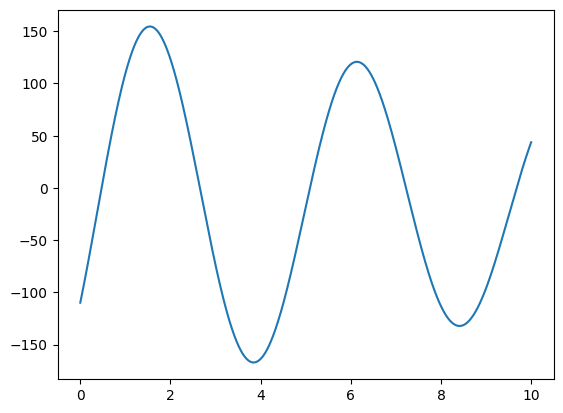

In [ ]:
plt.plot(t, modelo_artefacto(t, *popt))

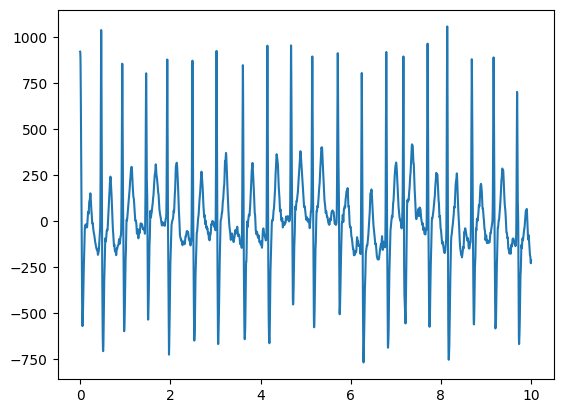

In [ ]:
plt.plot(t, ecg_filt_2-modelo_artefacto(t, *popt))